In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.manifold import TSNE
#matplotlib.style.use('ggplot')
%matplotlib inline 


In [4]:
url = 'https://www.cbf.com.br/competicoes/brasileiro-serie-a/classificacao/2017#.WoRENXXwbiw'
dfs = pd.read_html(url,skiprows=1)

In [5]:
tabela = dfs[0].drop([1], axis=1)
tabela.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1º,Corinthians - SP,72.0,38.0,21.0,9.0,8.0,50.0,30.0,20.0,12.0,9.0,2.0,6.0,81.0,1.0,63.0
1,2º,Palmeiras - SP,63.0,38.0,19.0,6.0,13.0,61.0,45.0,16.0,12.0,7.0,4.0,9.0,87.0,4.0,55.0
2,3º,Santos - SP,63.0,38.0,17.0,12.0,9.0,42.0,32.0,10.0,12.0,5.0,3.0,6.0,94.0,4.0,55.0
3,4º,Grêmio - RS,62.0,38.0,18.0,8.0,12.0,55.0,36.0,19.0,10.0,8.0,5.0,7.0,69.0,2.0,54.0
4,5º,Cruzeiro - MG,57.0,38.0,15.0,12.0,11.0,47.0,39.0,8.0,9.0,6.0,3.0,8.0,87.0,5.0,50.0


In [6]:
tabela.columns = ['Posição', 'Time','Pontos', 'Jogos','Vitórias','Empates','Derrotas','Gols Feitos','Gos Contra','Saldo de gols','Vitórias mandante','Vitórias Visitante', 'Derrotas mandante','Derrotas Visitantes','Cartões amarelos','Cartões vermelhos', 'Aproveitamento']

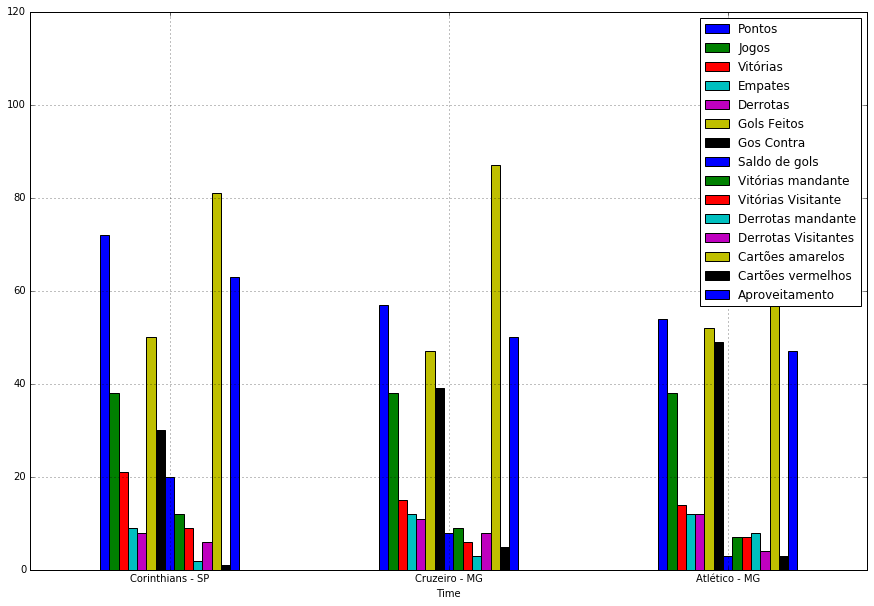

In [7]:
times = tabela.loc[[0,4,8]] 
grafico = times.plot(kind='bar',x=1,figsize=(15,10), grid=True, legend=True,rot=0)
plt.show()

In [18]:
tabelasta = dfs[0].drop([0,1,2], axis=1).drop([20])

In [70]:
distribuicao = TSNE(n_components=2).fit_transform(tabelasta) * 100000
distribuicao


array([[ 24.56137525,   1.83172287],
       [  1.81019004,   8.38481788],
       [ 13.05617951,  -7.63765859],
       [ -7.2642669 ,   3.041947  ],
       [  2.9642449 ,   3.59456604],
       [  3.58284158,  -2.08092721],
       [ 10.57638987,  -9.56056131],
       [  1.42544439,  -6.59314186],
       [  6.25377052,   7.71123975],
       [  2.10491988,   5.99665589],
       [ -2.7406448 , -14.60337065],
       [  5.53947205,  -1.33590323],
       [ 18.77831008, -10.8470789 ],
       [ -3.31709312, -10.74391558],
       [ -1.84063687,  10.31909667],
       [  6.8950385 ,  15.91455263],
       [  2.18697602,   3.84784841],
       [  1.71651952, -10.48297856],
       [  4.38830879,   1.37873016],
       [ -1.41770389,   2.22148988]])

In [95]:
listatimes = tabela.drop([20])[['Time']].values.tolist()

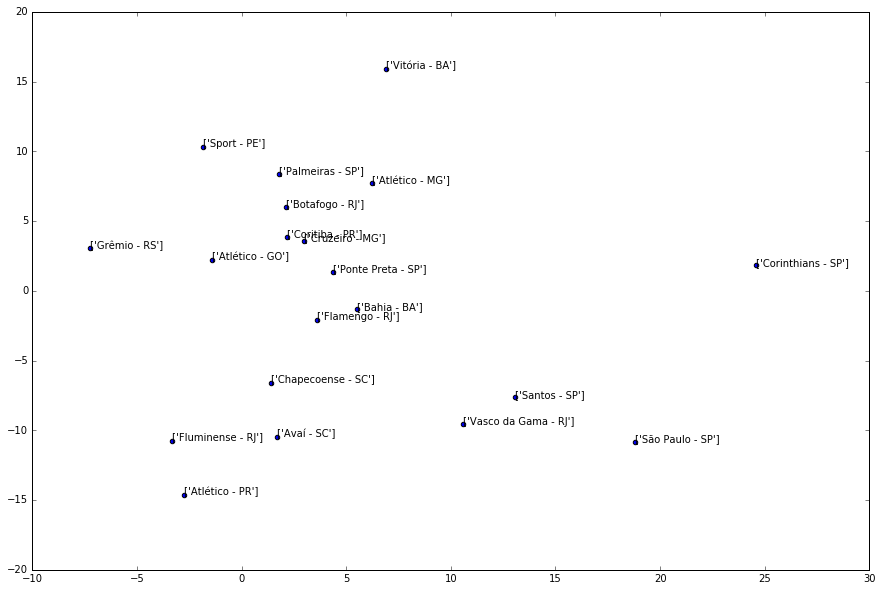

In [98]:
x = distribuicao[:, 0]
y = distribuicao[:, 1]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)

for i, txt in enumerate(listatimes):
    ax.annotate(txt, (x[i],y[i]))

plt.show()


In [99]:
dfs[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1º,NaN,Corinthians - SP,72.0,38.0,21.0,9.0,8.0,50.0,30.0,20.0,12.0,9.0,2.0,6.0,81.0,1.0,63.0
1,2º,NaN,Palmeiras - SP,63.0,38.0,19.0,6.0,13.0,61.0,45.0,16.0,12.0,7.0,4.0,9.0,87.0,4.0,55.0
2,3º,NaN,Santos - SP,63.0,38.0,17.0,12.0,9.0,42.0,32.0,10.0,12.0,5.0,3.0,6.0,94.0,4.0,55.0
3,4º,NaN,Grêmio - RS,62.0,38.0,18.0,8.0,12.0,55.0,36.0,19.0,10.0,8.0,5.0,7.0,69.0,2.0,54.0
4,5º,NaN,Cruzeiro - MG,57.0,38.0,15.0,12.0,11.0,47.0,39.0,8.0,9.0,6.0,3.0,8.0,87.0,5.0,50.0
5,6º,NaN,Flamengo - RJ,56.0,38.0,15.0,11.0,12.0,49.0,38.0,11.0,10.0,5.0,3.0,9.0,74.0,2.0,49.0
6,7º,NaN,Vasco da Gama - RJ,56.0,38.0,15.0,11.0,12.0,40.0,47.0,-7.0,8.0,7.0,4.0,8.0,105.0,2.0,49.0
7,8º,NaN,Chapecoense - SC,54.0,38.0,15.0,9.0,14.0,47.0,49.0,-2.0,9.0,6.0,7.0,7.0,105.0,2.0,47.0
8,9º,NaN,Atlético - MG,54.0,38.0,14.0,12.0,12.0,52.0,49.0,3.0,7.0,7.0,8.0,4.0,105.0,3.0,47.0
9,10º,NaN,Botafogo - RJ,53.0,38.0,14.0,11.0,13.0,45.0,42.0,3.0,9.0,5.0,7.0,6.0,94.0,2.0,46.0


In [41]:
dfs[0][[0,3,2]][3]

0     72.0
1     63.0
2     63.0
3     62.0
4     57.0
5     56.0
6     56.0
7     54.0
8     54.0
9     53.0
10    51.0
11    50.0
12    50.0
13    47.0
14    45.0
15    43.0
16    43.0
17    43.0
18    39.0
19    36.0
20     NaN
Name: 3, dtype: float64